## Observable Trends
#Most rides and drivers are in the Urban areas and the average fares are also significantly less in the urban cities.
#The Rural areas do not have enough coverage for the rides and there is good scope for ride service provided the fares can be kept reasonable. 
#Suburban areas have higher average costs per ride and has more drivers than rural, but still much lesser than the urban cities. 
#There is a significant variation in average fares for Urban, Suburban and Rural cities. 


In [1]:
# Import relevant libraries
#%matplotlib notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#Read the ride_data and city_data csv files into pandas dataframes. 
ride_df = pd.read_csv("raw_data/ride_data.csv")
city_df = pd.read_csv("raw_data/city_data.csv")
print(ride_df.head(3))
print(city_df.head(3))
#ride_city_df.dtypes

                 city                 date   fare        ride_id
0  Lake Jonathanshire  2018-01-14 10:14:22  13.83  5739410935873
1  South Michelleport  2018-03-04 18:24:09  30.24  2343912425577
2  Port Samanthamouth  2018-02-24 04:29:00  33.44  2005065760003
           city  driver_count   type
0   Richardfort            38  Urban
1  Williamsstad            59  Urban
2   Port Angela            67  Urban


In [3]:
#Merge the two dataframes on city.
ride_city_df = pd.merge(ride_df,city_df,on="city")
ride_city_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [4]:
#Split into 3 categories for later use in plotting as separate colors. Could not find a way to separate by type colors
#when it is groups together into cities for matplotlib. 
ride_city_df_gp_urban = ride_city_df.loc[ride_city_df["type"]=="Urban"]
ride_city_df_gp_suburban = ride_city_df.loc[ride_city_df["type"]=="Suburban"]
ride_city_df_gp_rural = ride_city_df.loc[ride_city_df["type"]=="Rural"]


In [5]:
print(ride_city_df_gp_urban.head(3))
print(ride_city_df_gp_suburban.head(3))
print(ride_city_df_gp_rural.head(3))

                 city                 date   fare        ride_id  \
0  Lake Jonathanshire  2018-01-14 10:14:22  13.83  5739410935873   
1  Lake Jonathanshire  2018-04-07 20:51:11  31.25  4441251834598   
2  Lake Jonathanshire  2018-03-09 23:45:55  19.89  2389495660448   

   driver_count   type  
0             5  Urban  
1             5  Urban  
2             5  Urban  
               city                 date   fare        ride_id  driver_count  \
1625  Barronchester  2018-01-27 03:08:01  27.79  6653622887913            11   
1626  Barronchester  2018-05-05 04:03:11  30.38  2281522828169            11   
1627  Barronchester  2018-04-25 19:11:43  36.13  2660177707065            11   

          type  
1625  Suburban  
1626  Suburban  
1627  Suburban  
                city                 date   fare        ride_id  driver_count  \
2250  Randallchester  2018-04-13 11:13:31  43.22  1076079536213             9   
2251  Randallchester  2018-02-19 03:52:47  58.55  8004803682564             

In [6]:
#Count of rides per type, city and average fare per type,city. 
#ride_city_df_group = ride_city_df.groupby("city")
#ride_city_df_ridecnt = ride_city_df_group["ride_id"].count()
#ride_city_df_ridecnt.head(5)
ride_city_df_group_urban = ride_city_df_gp_urban.groupby("city")
ride_city_df_ridecnt_urban = ride_city_df_group_urban["ride_id"].count()
ride_city_df_avgfare_urban = ride_city_df_group_urban["fare"].mean()
#For suburban
ride_city_df_group_suburban = ride_city_df_gp_suburban.groupby("city")
ride_city_df_ridecnt_suburban = ride_city_df_group_suburban["ride_id"].count()
ride_city_df_avgfare_suburban = ride_city_df_group_suburban["fare"].mean()
#for Rural
ride_city_df_group_rural = ride_city_df_gp_rural.groupby("city")
ride_city_df_ridecnt_rural = ride_city_df_group_rural["ride_id"].count()
ride_city_df_avgfare_rural = ride_city_df_group_rural["fare"].mean()

In [7]:
#print to view results.
print(ride_city_df_ridecnt_urban.tail(3))
print(ride_city_df_ridecnt_suburban.tail(3))
print(ride_city_df_ridecnt_rural.head(3))
#print avg fares for review and verification. 
print(ride_city_df_avgfare_urban.head(3))
print(ride_city_df_avgfare_suburban.head(3))
print(ride_city_df_avgfare_rural.head(3))

city
West Samuelburgh    25
Williamsstad        23
Williamsview        20
Name: ride_id, dtype: int64
city
West Hannah        21
West Kimmouth      20
Williamsonville    14
Name: ride_id, dtype: int64
city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Name: ride_id, dtype: int64
city
Amandaburgh    24.641667
Barajasview    25.332273
Carriemouth    28.314444
Name: fare, dtype: float64
city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Name: fare, dtype: float64
city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Name: fare, dtype: float64


In [8]:
#number of Drivers per type, city 
city_df_urban = city_df.loc[city_df["type"]=="Urban"]
city_df_suburban = city_df.loc[city_df["type"]=="Suburban"]
city_df_rural = city_df.loc[city_df["type"]=="Rural"]



In [9]:
print(city_df_urban.head(3))
print(city_df_suburban.head(3))
print(city_df_rural.head(3))


           city  driver_count   type
0   Richardfort            38  Urban
1  Williamsstad            59  Urban
2   Port Angela            67  Urban
          city  driver_count      type
66  Port Shane             7  Suburban
67    Lake Ann             3  Suburban
68  Lake Scott            23  Suburban
               city  driver_count   type
102  South Jennifer             7  Rural
103    West Heather             4  Rural
104      Newtonview             1  Rural


In [10]:
#Use sum incase data is such that there are multiple rows per city with a driver count in city_df. 
city_df_urban_groupbycity = city_df_urban.groupby("city")
city_df_urban_drivercnt = city_df_urban_groupbycity["driver_count"].sum()
#Driver count for suburban
city_df_suburban_groupbycity = city_df_suburban.groupby("city")
city_df_suburban_drivercnt = city_df_suburban_groupbycity["driver_count"].sum()
#Driver count for rural
city_df_rural_groupbycity = city_df_rural.groupby("city")
city_df_rural_drivercnt = city_df_rural_groupbycity["driver_count"].sum()

In [11]:
print(city_df_urban_drivercnt.head(3))
print(city_df_suburban_drivercnt.head(3))
print(city_df_rural_drivercnt.head(3))

city
Amandaburgh    12
Barajasview    26
Carriemouth    52
Name: driver_count, dtype: int64
city
Barronchester    11
Bethanyland      22
Brandonfort      10
Name: driver_count, dtype: int64
city
Bradshawfurt      7
Garzaport         7
Harringtonfort    4
Name: driver_count, dtype: int64


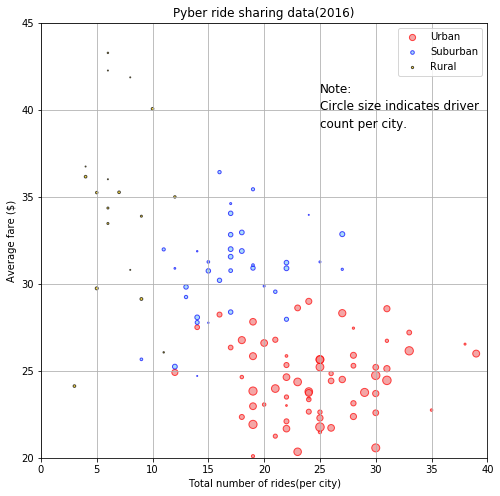

In [12]:
#plot the values determined above as a bubble chart.
plt.figure(figsize=(8,8))
#plot values for urban
plt.scatter(ride_city_df_ridecnt_urban,ride_city_df_avgfare_urban,s=city_df_urban_drivercnt,alpha=0.7,
            marker='o',facecolors=["Lightcoral"],edgecolors=["Red"],label="Urban")
#Plot values for suburban.
plt.scatter(ride_city_df_ridecnt_suburban,ride_city_df_avgfare_suburban,s=city_df_suburban_drivercnt,
            alpha=0.7,marker='o',facecolors=["Lightskyblue"],edgecolors=["blue"],label="Suburban")  
#Plot values for Rural.
plt.scatter(ride_city_df_ridecnt_rural,ride_city_df_avgfare_rural,s=city_df_rural_drivercnt,
            alpha=0.7,marker='o',facecolors=["Gold"],edgecolors=["Black"],label="Rural") 
                      
##plt.scatter(ride_city_df_ridecnt,ride_df_averagefare,marker='o',facecolors=["gold","Lightskyblue","Lightcoral"],
##            s=city_df_drivercnt,alpha=0.5)
#plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",s=x_axis, alpha=0.75)
plt.xlim(0,40)
plt.ylim(20,45)
#plt.tight_layout()
plt.title("Pyber ride sharing data(2016)")
plt.xlabel("Total number of rides(per city)")
plt.ylabel("Average fare ($)")
plt.legend(loc='upper right')
plt.grid()
plt.text(25, 41, "Note:", fontsize=12)
plt.text(25, 40, "Circle size indicates driver", fontsize=12)
plt.text(25, 39, "count per city.", fontsize=12)
#plt.hlines(0, 0, 10, alpha=0.25)   
#Wedge percentages
#Wedge labels
plt.savefig('pyber_bubbleplot.pdf')
plt.show()


In [13]:
#Determine  % of total fares by city type
ride_city_df2 = ride_city_df
ride_city_df2_totalsbytype = ride_city_df2.groupby("type")["fare"].sum()
ride_city_df2_totalsbytype
#total_alltypes = ride_city_df2_totalsbytype.sum()
#total_alltypes 
#ride_city_typepercent = (ride_city_df2_totalsbytype / total_alltypes) * 100
#ride_city_typepercent

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

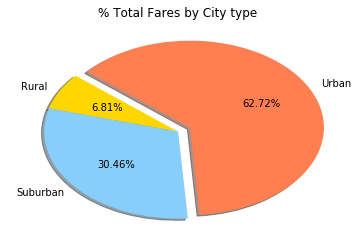

In [14]:
#Create and show  pie chart for Total fares by city type.
explode = (0, 0, 0.1)
labels=("Rural","Suburban","Urban")
colors=("Gold","Lightskyblue","Coral")
plt.pie(ride_city_df2_totalsbytype, explode=explode, labels=labels, colors=colors,
        autopct="%1.2f%%", shadow=True, startangle=140)
plt.title("% Total Fares by City type")
plt.savefig('pyber_faresbycitytype.pdf')
plt.show()


In [15]:
#Determine Total rides by city type.
ride_city_df3 = ride_city_df
ride_city_df2_totalridesbytype = ride_city_df2.groupby("type")["ride_id"].count()
ride_city_df2_totalridesbytype

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

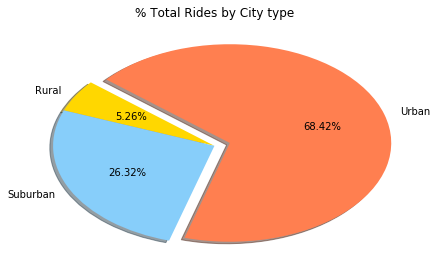

In [16]:
#Create and show  pie chart for Total rides by city type.
explode = (0, 0, 0.1)
labels=("Rural","Suburban","Urban")
colors=("Gold","Lightskyblue","Coral")
plt.pie(ride_city_df2_totalridesbytype, explode=explode, labels=labels, colors=colors,
        autopct="%1.2f%%", shadow=True, startangle=140)
plt.title("% Total Rides by City type")
plt.tight_layout()
plt.savefig('pyber_ridesbycitytype.pdf')
plt.show()

In [17]:
#Determine Drivers rides by city type.
city_df2 = city_df
city_df2_drivercntbytype = city_df2.groupby("type")["driver_count"].sum()
city_df2_drivercntbytype 

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

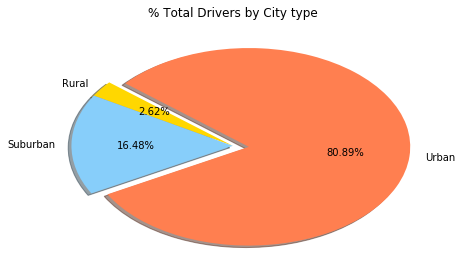

In [18]:
#Create and show  pie chart for Total rides by city type.
explode = (0, 0, 0.1)
labels=("Rural","Suburban","Urban")
colors=("Gold","Lightskyblue","Coral")
plt.pie(city_df2_drivercntbytype, explode=explode, labels=labels, colors=colors,
        autopct="%1.2f%%", shadow=True, startangle=140)
plt.title("% Total Drivers by City type")
plt.tight_layout()
plt.savefig('pyber_Driversbycitytype.pdf')
plt.show()